# WeRateDogs Twitter Analysis

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#viz">Analyzing and Visualizing Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I'll wrangle and analyze the Twitter archive of WeRateDogs using data from multiple sources. WeRateDogs is an account that rates people's dogs with humourous comments, usually giving dogs ratings above 10 over 10 i.e. 11/10 and classifying the dog as a floofer, pupper, doggo.

In [1]:
# importing necessary libraries and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer


<a id='gather'></a>
## Gathering Data

Here, I will gather data from three sources, a file that was manually downloaded, another programmatically downloaded and the last through Twitter's API and Tweepy

1. Manually downloaded data 




In [2]:
# saving the manually downloaded dataset into a dataframe
manual_df = pd.read_csv('/content/twitter-archive-enhanced.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
manual_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Programmatically downloaded data

In [4]:
# creating a new folder if it does not exist

folder = 'image_predictions'
if not os.path.exists(folder):
    os.makedirs(folder)

In [5]:
# storing the tsv file from the url 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
# reading the file into a dataframe
image_pred = pd.read_csv('/content/image_predictions/image-predictions.tsv', sep='\t')

In [7]:
# inspecting the first 5 rows of the dataframe
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Twitter API and Tweepy data

In [ ]:
# entering twitter api secrets and tokens (purposely hashed out here) 
api_key = 'notmyapikey'
api_secret = 'notmyapisecret'
bearer_token = 'notmybearertoken'
access_token = 'notmyaccesstoken'
access_secret = 'notmyaccesssecret'

In [ ]:
# setting the parameters
auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# using the ids from the first file to access the full tweet data
tweet_ids = manual_df.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # this loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [8]:
# convert txt file to json
twitter_data = pd.read_json("/content/tweet_json.txt", lines=True)

In [9]:
# convert json to csv
twitter_data.to_csv('/content/twitter_data.csv', index=False)

In [10]:
# reading the csv file into a dataframe
tweet_data = pd.read_csv('/content/twitter_data.csv')

In [11]:
# inspecting the first 5 rows of the data
tweet_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [12]:
# subsetting to select only the tweet id, favourite count and retweet count
subtweet_data = tweet_data[['id', 'retweet_count', 'favorite_count']]

<a id='assess'></a>
## Assessing Data

Here, I will be assessing all three datasets visually and programmatically for quality and tidiness issues 

Visual assessment

In [13]:
manual_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
# checking for datatypes and missing data
manual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# statistic description
manual_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# checking for duplicates generally
manual_df.duplicated().sum()

0

In [17]:
# checking for duplicates in the tweet id column
manual_df['tweet_id'].duplicated().sum()

0

In [18]:
# checking through the top names
manual_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [19]:
# checking through unique names
manual_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [20]:
# visual assessment
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
# checking for datatypes and missing data
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# checking for duplicates
image_pred.duplicated().sum()

0

In [23]:
# visual assessment
subtweet_data

,id,retweet_count,favorite_count
0,892420643555336193,6876,32853
1,892177421306343426,5178,28388
2,891815181378084864,3421,21338
3,891689557279858688,7075,35806
4,891327558926688256,7590,34252
...,...,...,...
2319,666049248165822465,35,85
2320,666044226329800704,113,242
2321,666033412701032449,35,98
2322,666029285002620928,39,111


In [24]:
# checking for datatypes and missing data
subtweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2324 non-null   int64
 1   retweet_count   2324 non-null   int64
 2   favorite_count  2324 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [25]:
# statistical assessment
subtweet_data.describe()

,id,retweet_count,favorite_count
count,2.324000e+03,2324.000000,2324.000000
mean,7.417160e+17,2424.597246,6863.250000
std,6.815435e+16,4104.509231,10658.241192
min,6.660209e+17,0.000000,0.000000
25%,6.780228e+17,487.000000,1195.750000
50%,7.178159e+17,1126.500000,2970.000000
75%,7.986324e+17,2805.000000,8389.250000
max,8.924206e+17,69389.000000,141509.000000


In [26]:
# checking for duplicates
subtweet_data.duplicated().sum()

0

### Quality issues

*manual_df* table
1. `tweet_id` is an integer not a string
2. many missing records for `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns
3. `timestamp` is an object not timestamp
4. `name` column seems to have wrong names and stop words instead of names i.e 'a', 'old', 'one', 'the'
5. (Given in classroom) - some records are retweets, we only want original ratings with images
6. There are many None values in `puppo`, `pupper`, `floofer` and `doggo` columns but no null values when checked with .info()

*image_pred* table
1. `tweet_id` is an integer not a string
2. inconsistent casing in `p1`, `p2`, `p3` columns
3. `p1`, `p2`, `p3` column names are not well descriptive

*subtweet_data* table
1. `id` is an integer not a string
2. `id` is represented as `tweet_id` in other tables

### Tidiness issues

1. One variable in four columns (`puppo`, `pupper`, `floofer` and `doggo`) in *manual_df* table
2. The archive twitter dataset and the newly scraped twitter dataset tables should be joined 

<a id='clean'></a>
## Clean

In [27]:
# creating copies of the dataframes
manual_df_clean = manual_df.copy()
image_pred_clean = image_pred.copy()
subtweet_data_clean = subtweet_data.copy()

### Quality Issues Fixes

#### `manual_df`: `tweet_id` is an integer not a string



#### Define

_The best way to store ids are strings so I will convert to strings_

#### Code

In [28]:
manual_df_clean['tweet_id'] = manual_df_clean['tweet_id'].astype(str)

#### Test

In [29]:
manual_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### `manual_df`: many missing records for `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns


#### Define

_The columns are to indicate which tweets are replies and retweets, hence the many missing records. We only want original tweets so I'll be removing records where `in_reply_to_status_id` and `retweeted_status_id` are true and then drop the columns_

#### Code

In [30]:
# get indexes for which in_reply_to_status_id are not NaN
replies = manual_df_clean[manual_df_clean['in_reply_to_status_id'].notna()].index

# drop records with the indexes
manual_df_clean.drop(replies, inplace=True)

Repeating for retweeted records

In [31]:
# get indexes for which retweeted_status_id are not NaN
retweets = manual_df_clean[manual_df_clean['retweeted_status_id'].notna()].index

# drop records with the indexes
manual_df_clean.drop(retweets, inplace=True)

In [32]:
# dropping both columns now that they're both empty as well as 
manual_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [33]:
manual_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


#### `manual_df`: timestamp is an object not timestamp


#### Define
_`timestamp` is an object datatype here instead of a timestamp_

#### Code

In [34]:
manual_df_clean['timestamp'] = pd.to_datetime(manual_df_clean['timestamp'])

#### Test

In [35]:
manual_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
manual_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### `manual_df`: name column seems to have wrong names i.e 'a'


#### Define

_`name` seems to include stop words and some wrong names. Noticeably, they are all in lowercase_

#### Code

In [37]:
# getting the names in lowercase in a series
lowercase_names = manual_df_clean['name'][manual_df_clean['name'].str[0].str.islower()].unique()

In [38]:
# checking to make sure we do not remove actual names
lowercase_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [39]:
# replacing values with None
manual_df_clean['name'] = manual_df_clean['name'].replace(lowercase_names, None)

In [41]:
# replacing all None values with pd.NA
manual_df_clean['name'] = manual_df_clean['name'].replace('None', pd.NA)

#### Test

In [40]:
manual_df_clean['name'].value_counts()

None          639
Oliver         12
Lucy           11
Charlie        11
Cooper         10
             ... 
Leela           1
Glenn           1
Shelby          1
Sephie          1
Christoper      1
Name: name, Length: 930, dtype: int64

We have 639 None names. According to this [Stack overflow answer](https://stackoverflow.com/a/64362066), it is better to use pd.NA instead of None or np.nan. Hence, I will replace all None values with pd.NA

In [42]:
manual_df_clean['name'].value_counts()

Oliver        12
Charlie       11
Lucy          11
Cooper        10
Penny          9
              ..
Leela          1
Glenn          1
Shelby         1
Sephie         1
Christoper     1
Name: name, Length: 929, dtype: int64

In [43]:
manual_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1458 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### `image_pred`: tweet_id is an integer not a string


#### Define

_The best way to store ids are strings so I will convert to strings_

#### Code

In [44]:
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

#### Test

In [45]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### `image_pred`: inconsistent casing in p1, p2, p3 columns


#### Define

_Some breeds are represented in Sentence camel casing while others are in lower camel cases._

#### Code

In [46]:
image_pred_clean['p1'] = image_pred_clean['p1'].str.capitalize()

In [47]:
image_pred_clean['p2'] = image_pred_clean['p2'].str.capitalize()

In [48]:
image_pred_clean['p3'] = image_pred_clean['p3'].str.capitalize()

#### Test

In [49]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### `image_pred`: p1, p2, p3 column names are not well descriptive


#### Define

_`p1`, `p2` and `p3` are not easy to understand at first glance. I'll change the names to better depict what they represent_

#### Code

In [50]:
image_pred_clean.rename(columns={'p1':'first_prediction', 'p2':'second_prediction', 'p3':'third_prediction'}, inplace=True)

#### Test

In [51]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   object 
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   first_prediction   2075 non-null   object 
 4   p1_conf            2075 non-null   float64
 5   p1_dog             2075 non-null   bool   
 6   second_prediction  2075 non-null   object 
 7   p2_conf            2075 non-null   float64
 8   p2_dog             2075 non-null   bool   
 9   third_prediction   2075 non-null   object 
 10  p3_conf            2075 non-null   float64
 11  p3_dog             2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### `manual_df`: (Given in classroom) - some records are retweets, we only want original ratings with images


#### Define
_We have already removed retweets from the manual_df table. To ensure that the tweets we have left have images, we'll need to join manual_df with the image_pred table._

#### Code

In [52]:
# first we'll remove records from image_pred with no images
no_images = image_pred_clean[image_pred_clean['img_num']==0].index

In [53]:
no_images

Int64Index([], dtype='int64')

In [54]:
# subsetting for only the image info and tweet ids
images = image_pred_clean[['tweet_id', 'jpg_url', 'img_num']]

In [55]:
tweets_and_images = pd.merge(manual_df_clean, images, on='tweet_id', how='left')

In [56]:
# removing tweets where there are no images
no_images = tweets_and_images[tweets_and_images['img_num'].isna()].index
tweets_and_images.drop(no_images, inplace=True)

#### Test

In [57]:
tweets_and_images.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num
2092,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,<NA>,None,None,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0
2093,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,<NA>,None,None,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0
2094,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,<NA>,None,None,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0
2095,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,<NA>,None,None,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0
2096,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,<NA>,None,None,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0


In [58]:
tweets_and_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1413 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  jpg_url             1971 non-null 

`manual_df`: There are many None values in `puppo`, `pupper`, `floofer` and `doggo` columns but no null values when checked with .info()

#### Define
_Replace None with pd.NA in  all 4 columns_

#### Code

In [59]:
tweets_and_images['doggo'] = tweets_and_images['doggo'].replace('None', pd.NA)

In [60]:
tweets_and_images['puppo'] = tweets_and_images['puppo'].replace('None', pd.NA)

In [61]:
tweets_and_images['pupper'] = tweets_and_images['pupper'].replace('None', pd.NA)

In [62]:
tweets_and_images['floofer'] = tweets_and_images['floofer'].replace('None', pd.NA)

#### Test

In [63]:
tweets_and_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1413 non-null   object             
 8   doggo               73 non-null     object             
 9   floofer             8 non-null      object             
 10  pupper              209 non-null    object             
 11  puppo               23 non-null     object             
 12  jpg_url             1971 non-null 

Less than half of the rated dogs have stages attached!

#### `subtweet_data`: id is an integer not a string


#### Define
_The best way to store ids are strings so I will convert to strings_

#### Code

In [64]:
subtweet_data_clean['id'] = subtweet_data_clean['id'].astype(str)

#### Test

In [65]:
subtweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2324 non-null   object
 1   retweet_count   2324 non-null   int64 
 2   favorite_count  2324 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


#### `subtweet_data`: id is represented as 'tweet_id' in other tables


#### Define

_rename `id` to `tweet_id` for uniformity_

#### Code

In [66]:
subtweet_data_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [67]:
subtweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2324 non-null   object
 1   retweet_count   2324 non-null   int64 
 2   favorite_count  2324 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Tidiness Issues Fixes

#### `manual_df`: One variable in four columns (puppo, pupper, floofer and doggo)


#### Define

_This disobeys the first rule of tidiness. Hence, I'll put all four stages in one column_

#### Code

In [75]:
# now using tweets_and_images df instead of manual df

tweets_and_images['stages'] = tweets_and_images['puppo'] + tweets_and_images['pupper'] + tweets_and_images['floofer'] + tweets_and_images['doggo']

This did not work well so I'll replace null values with empty strings

In [71]:
tweets_and_images['doggo'] = tweets_and_images['doggo'].replace(pd.NA, '')

In [72]:
tweets_and_images['puppo'] = tweets_and_images['puppo'].replace(pd.NA, '')

In [73]:
tweets_and_images['pupper'] = tweets_and_images['pupper'].replace(pd.NA, '')

In [74]:
tweets_and_images['floofer'] = tweets_and_images['floofer'].replace(pd.NA, '')

In [78]:
# dropping the columns
tweets_and_images.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1, inplace=True)

In [80]:
# replacing empty values in the stages column with null values
tweets_and_images['stages'] = tweets_and_images['stages'].replace('', pd.NA)

#### Test

In [81]:
tweets_and_images.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,<NA>
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,<NA>
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,<NA>
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,<NA>
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,<NA>
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,<NA>,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,<NA>
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,<NA>
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,<NA>,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,<NA>
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,<NA>
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,doggo


#### The archive twitter dataset and the newly scraped twitter dataset tables should be joined


#### Define

#### Code

The third rule of tidiness was broken when both tables should be an observational unit.

In [101]:
combo = pd.merge(tweets_and_images, subtweet_data_clean, on='tweet_id', how='left')

#### Test

In [102]:
combo.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,stages,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,<NA>,6876.0,32853.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,<NA>,5178.0,28388.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,<NA>,3421.0,21338.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,<NA>,7075.0,35806.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,<NA>,7590.0,34252.0


In [103]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1413 non-null   object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   float64            
 10  stages              303 non-null    object             
 11  retweet_count       1962 non-null   float64            
 12  favorite_count      1962 non-null 

Looks like some tweets in the tweets_and_images df did not get scraped. For visualization purposes, I'll drop those tweets

<a id='store'></a>
## Storing Data

In [86]:
# storing the dataframes to a csv file
combo.to_csv('twitter_archive_master.csv', index=False)
image_pred_clean.to_csv('image_predictions.csv', index=False)

<a id='viz'></a>
## Analyzing and Visualizing Data

> I plan to explore the 
>- Top 5 most popular dog names 
>- Top 5 breeds in the first predictions by the neural network
>- Relationship between the ratings and favourite count
>- Relationship between the number of images and retweet count


### Popular dog names

In [88]:
names = combo['name']

Text(0, 0.5, 'Names')

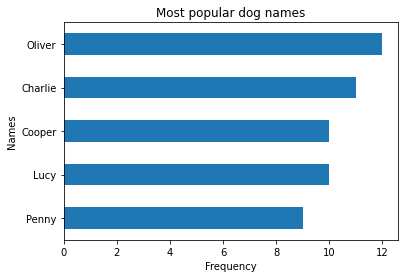

In [97]:
names.value_counts()[0:5].sort_values(ascending=True).plot(kind='barh')
plt.title('Most popular dog names')
plt.xlabel('Frequency')
plt.ylabel('Names')  

Seems like many owners love Oliver!

### Most common first breed predictions

Text(0, 0.5, 'Breeds')

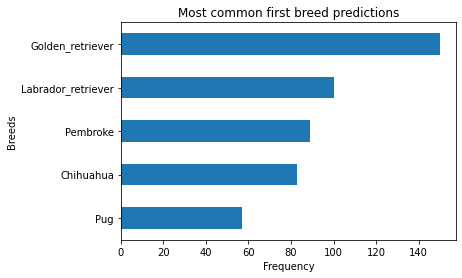

In [98]:
image_pred_clean['first_prediction'].value_counts()[0:5].sort_values(ascending=True).plot(kind='barh')
plt.title('Most common first breed predictions')
plt.xlabel('Frequency')
plt.ylabel('Breeds')

Retrievers are definitely really popular

### Relationship between the ratings and favourite count

In [104]:
# dropping records where favorite_count and retweet_count are null
no_rts = combo[combo['retweet_count'].isna()].index

# drop records with the indexes
combo.drop(no_rts, inplace=True)

In [105]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1970
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1962 non-null   object             
 1   timestamp           1962 non-null   datetime64[ns, UTC]
 2   source              1962 non-null   object             
 3   text                1962 non-null   object             
 4   expanded_urls       1962 non-null   object             
 5   rating_numerator    1962 non-null   int64              
 6   rating_denominator  1962 non-null   int64              
 7   name                1406 non-null   object             
 8   jpg_url             1962 non-null   object             
 9   img_num             1962 non-null   float64            
 10  stages              301 non-null    object             
 11  retweet_count       1962 non-null   float64            
 12  favorite_count      1962 non-null 

Text(0, 0.5, 'Favourite count')

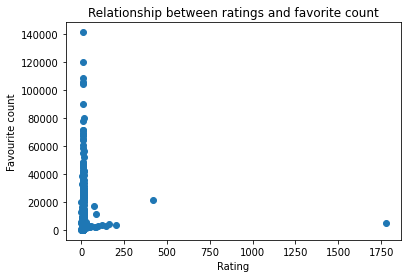

In [106]:
plt.scatter(x=combo['rating_numerator'], y=combo['favorite_count'])
plt.title('Relationship between ratings and favorite count')
plt.xlabel('Rating')
plt.ylabel('Favourite count')

There's no correlation between ratings and the favourite count.

### Relationship between the number of images present and retweet count

Text(0, 0.5, 'Retweet count')

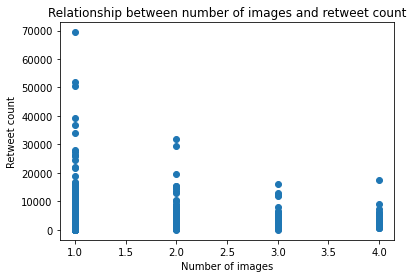

In [107]:
plt.scatter(x=combo['img_num'], y=combo['retweet_count'])
plt.title('Relationship between number of images and retweet count')
plt.xlabel('Number of images')
plt.ylabel('Retweet count')

There's no correlation between number of images and the retweet count.